In [25]:
%load_ext autoreload
%autoreload 2

from PyDeep import *
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
N, D, K, b = 1000, 1, 1, 100

X, Y = make_regression(n_samples=N, n_features=D, n_targets=K, bias=b, noise=20)

if K == 1:  Y = Y[..., None]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=12)

In [40]:
NN = Sequential(Linear(D, K))
criterion = MSE(K)

In [41]:
loss_train, loss_test = [], []

for _ in range(10000):

    loss_test.append(criterion(NN(X_test, track=False), Y_test, track=False))

    loss_train.append(criterion(NN(X_train), Y_train))

    NN.backward(criterion.backward())
    NN.step(1e-1)

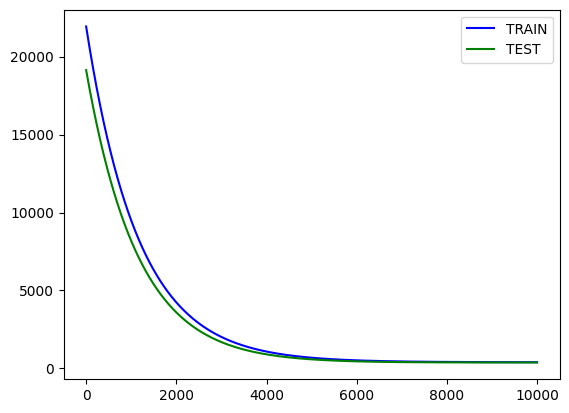

In [42]:
utils.plot(
    (loss_train, "TRAIN"),
    (loss_test, "TEST")
)

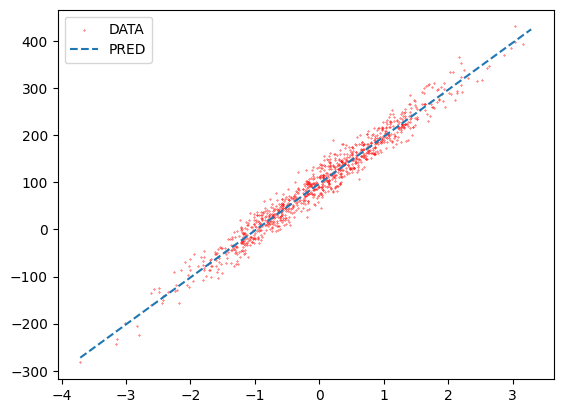

In [44]:
plt.scatter(X[:, 0], Y[:, 0], s=0.1, c="red", label="DATA")
plt.plot(np.arange(np.min(X), np.max(X) + 1), NN(np.arange(np.min(X), np.max(X) + 1)[:, None]), linestyle="--", label="PRED")
plt.legend()
plt.show()
plt.close()